# Recap lecture 1
- GUI 
- Transmon qubit, tunable Transmon
- Eigenvalues and wavefunctions
- Matrix elements

# This lecture: coherence time
https://scqubits.readthedocs.io/en/latest/guide/guide-noise.htmlhttps://scqubits.readthedocs.io/en/latest/guide/guide-noise.html

## Depolarization
When the amplitude of the noise is small, the interaction between the qubit and the bath can be approximated by 
\begin{equation}\label{eq:basics:int}
    \hat{\mathcal{H}}_\text{int} = \hat{G}_\lambda \delta\lambda,
\end{equation}
where $\hat{G}_\lambda$ is the qubit operator that couples to the noise source $\lambda$. The fluctuation $\delta\lambda$ around the controlled value $\lambda_0$ can be either a classical variable or a quantum operator.
The qubit relaxation and excitation rates can then be derived as
\begin{equation}
    \Gamma_\downarrow = \dfrac{1}{\hbar^2}|\langle 0 | \hat{G}_\lambda | 1\rangle|^2 S_\lambda(\omega_\text{q}), 
    \qquad
    \Gamma_\uparrow = \dfrac{1}{\hbar^2}|\langle 0 | \hat{G}_\lambda | 1\rangle|^2 S_\lambda(-\omega_\text{q}).
\end{equation}
Here $S_\lambda(\omega)$ is the noise spectral density of the noise source
\begin{equation}
    S_\lambda(\omega) = \int_{-\infty}^{\infty} e^{i\omega t} \langle \delta\lambda(t)\delta\lambda(0)\rangle,
\end{equation}
with $\langle \delta\lambda(t)\delta\lambda(0)\rangle$ the autocorrelation of the noise. 
In thermal equilibrium, the two transition rates obey the detailed balance relation
\begin{equation}
    \dfrac{\Gamma_\uparrow }{\Gamma_\downarrow} = \exp\left(-\dfrac{\hbar\omega_\text{q}}{k_\text{B}T}\right),
\end{equation}
and the excitation rate is negligible when the temperature is much smaller than the qubit frequency. 
In general, both processes contribute to the depolarization time $T_1$, defined as 
\begin{equation}
    \dfrac{1}{T_1} = \Gamma_\downarrow + \Gamma_\uparrow.
\end{equation}

https://scqubits.readthedocs.io/en/latest/guide/noise/depolarization.html

## Pure dephasing
Unlike depolarization, pure phasing does not induce transitions between logical states. With the same qubit--bath interaction, the pure dephasing rate is derived to be 
\begin{equation}
    \Gamma_\phi = \dfrac{1}{2\hbar^2}\left( \langle 0 | \hat{G}_\lambda | 0\rangle - \langle 1 | \hat{G}_\lambda | 1 \rangle  \right)^2 S_\lambda(0)= \dfrac{1}{2\hbar^2}\left( \dfrac{\partial E_{01}}{\partial \lambda}  \right)^2 S_\lambda(0).
\end{equation}
The second equality above assumes $\hat{G}_\lambda=\partial\hat{\mathcal{H}}/\partial\lambda$, which is a result of the Taylor expansion 
\begin{equation}
    \hat{\mathcal{H}} \approx \hat{\mathcal{H}}(\delta\lambda=0) + \dfrac{\partial\hat{\mathcal{H}}}{\partial \lambda}\delta\lambda + \mathcal{O}(\delta\lambda^2) . 
\end{equation}
In the case when $\partial E_{01} / \partial \lambda =0$ for a certain controlled value $\lambda_0$ (a so-called \textit{sweet spot}), higher order contributions must be considered.

https://scqubits.readthedocs.io/en/latest/guide/noise/dephasing.html

## Effective noise channels

**Depolarization.** scqubits can approximate the (cumulative) effective noise, calculated form the total contributions of a variety of noise channels (that can be fine-tuned by the user). In the case of depolarization noise, the effective (or combined) noise is obtained from 

\begin{equation}
\frac{1}{T_{1}^{\rm eff}} = \sum_k \frac{1}{T_{1}^{k}},
\end{equation}

where the sum runs over all noise channels that the user wants included. By default, the set of noise channels correponds to the list returned by the `effective_noise_channels` method for each qubit. A different list of noise channels can be provided as an argument. 

**Dephasing.** Similarly, users can calculate effective dephasing times, which includes contributions from both pure dephasing, as well as depolarization channels. Such a $T_{2}$ time is defined as

\begin{equation}
\frac{1}{T_{2}^{\rm eff}} = \sum_k \frac{1}{T_{\phi}^{k}} +  \frac{1}{2} \sum_j \frac{1}{T_{1}^{j}}, 
\end{equation}

where $k$ ($j$) run over the relevant pure dephasing (depolariztion) channels that can contribute to the effective noise. 

**Example: effective $T_1$.** For the above transmon, we obtain

## Basic coherence time calculations: noise channels

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import numpy as np
import scqubits as scq

### qubit initialization

In [3]:
tune_tmon = scq.TunableTransmon(
    EJmax=20.0,
    EC=0.5,
    d=0.00,
    flux=0.1,
    ng=0.3,
    ncut=150
)

print(tune_tmon)

TunableTransmon-----| [TunableTransmon_1]
                    | EJmax: 20.0
                    | EC: 0.5
                    | d: 0.0
                    | flux: 0.1
                    | ng: 0.3
                    | ncut: 150
                    | truncated_dim: 6
                    |
                    | dim: 301



### supported noise channels

In [4]:
tune_tmon.supported_noise_channels()

['tphi_1_over_f_flux',
 'tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive',
 't1_flux_bias_line',
 't1_charge_impedance']

### specific noise channel

In [5]:
tune_tmon.tphi_1_over_f_flux()

8088.317057546055

The above result is given in inverse frequncy units. The default frequency units in scqubits are GHz. One can check the currently active unit setting by calling

In [6]:
scq.get_units()

'GHz'

can get rate instead of time

In [7]:
tune_tmon.tphi_1_over_f_flux(get_rate=True)

0.0001236351138172857

### options 

In [8]:
tune_tmon.t1_charge_impedance(i=3, j=1, T=0.100, get_rate=True, total=False)

See documentation for details.
This warning can be disabled by executing:
scqubits.settings.T1_DEFAULT_WARNING=False

 C:\Users\geev\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\scqubits\core\noise.py: 1200

5.615534273392619e-05

decay from i=3 to j=1, temperature is 0.1 K

### effective coherence time calculation

In [9]:
tune_tmon.effective_noise_channels()

['tphi_1_over_f_flux',
 'tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive',
 't1_flux_bias_line']

In [10]:
tune_tmon.supported_noise_channels()

['tphi_1_over_f_flux',
 'tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive',
 't1_flux_bias_line',
 't1_charge_impedance']

As shown above the supported_noise_channels list contains an extra noise channel t1_charge_impedance. Since in most implementations, charge lines are not directly coupled to transmon qubits, this channel is by default not included in the effective coherence time calculations.

In [11]:
tune_tmon.t1_effective()

15644.923932573467

In [12]:
tune_tmon.t2_effective()

6341.746362164145

Users can also specify both what channels should be included in effective coherence time calculations, as well as what the various parameters should be.

In [13]:
tune_tmon.t1_effective(noise_channels=['t1_charge_impedance', 't1_flux_bias_line'],
                       common_noise_options=dict(T=0.050))

0.195010281086235

In [14]:
tune_tmon.t2_effective(noise_channels=['t1_flux_bias_line','t1_capacitive',
                                      ('tphi_1_over_f_flux', dict(A_noise=3e-6))],
                       common_noise_options=dict(T=0.050))

2482.0715515758134

### Visualization of coherence times

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

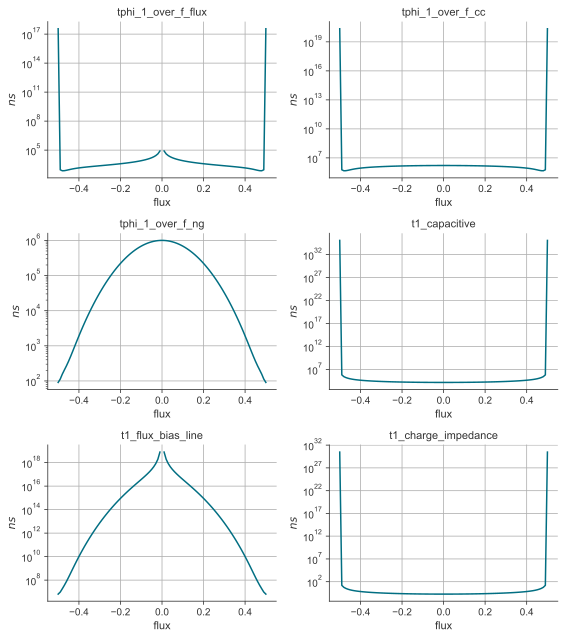

In [15]:
tune_tmon.plot_coherence_vs_paramvals(param_name='flux',
                                      param_vals=np.linspace(-0.5, 0.5, 101));

note that at sweet spot there is no second order noise considered yet, and returns `np.nan`

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

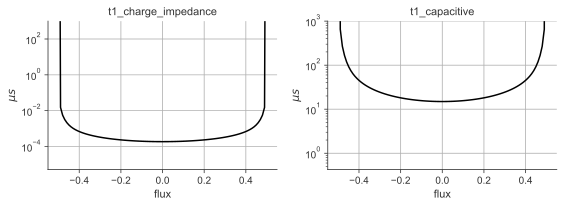

In [16]:
fig, ax = tune_tmon.plot_coherence_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(-0.5, 0.5, 100),
    noise_channels=['t1_charge_impedance', 't1_capacitive'],
    scale=1e-3,
    ylabel=r"$\mu s$",
    color='black',
    ylim=(None, 1e3)
)

the time unit has been changed to microsecond from nanosecond

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

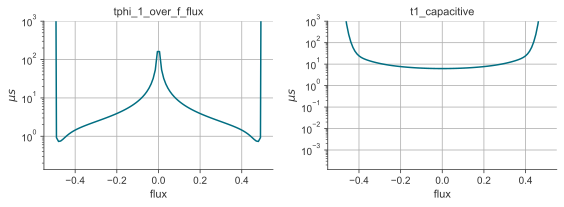

In [17]:
tune_tmon.plot_coherence_vs_paramvals(
                     param_name='flux',
                     param_vals=np.linspace(-0.5, 0.5, 100),
                     noise_channels = ['tphi_1_over_f_flux',
                                      ('t1_capacitive', dict(i=3, j=2))],
                     common_noise_options=dict(T=0.100),
                     scale=1e-3,
                     ylabel=r"$\mu s$",
                     ylim=(None, 1e3)
                    );

### Visualization of effective noise

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

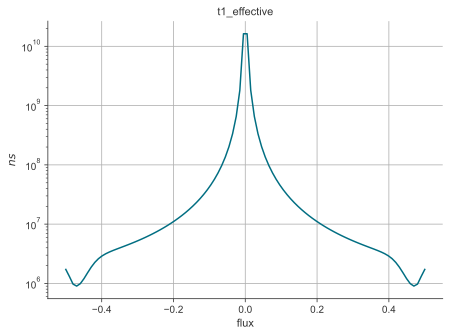

In [18]:
tune_tmon.plot_t1_effective_vs_paramvals(param_name='flux',
                            param_vals=np.linspace(-0.5, 0.5, 100),
                            common_noise_options=dict(T=0.050, i=2, j=0));

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

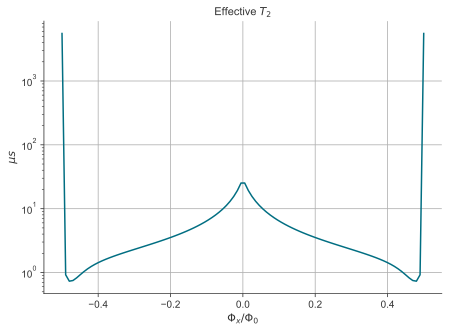

In [19]:
tune_tmon.plot_t2_effective_vs_paramvals(param_name='flux',
                            param_vals=np.linspace(-0.5, 0.5, 100),
                            noise_channels=['t1_capacitive', 't1_flux_bias_line',
                                            ('tphi_1_over_f_flux', dict(A_flux=3e-6))],
                            common_noise_options=dict(T=0.050),
                            scale=1e-3,
                            ylabel=r"$\mu s$",
                            xlabel=r"$\Phi_x/\Phi_0$",
                            title=r"Effective $T_{2}$",
                            grid='red'
                            );

### Fluxonium

In [20]:
# Pop 2014 paper. 
fluxonium = scq.Fluxonium(
    EJ=12,
    EC=2.6,
    EL=0.5,
    cutoff = 150,
    flux = 0.2
)
print(fluxonium)
fluxonium.supported_noise_channels()

Fluxonium-----------| [Fluxonium_1]
                    | EJ: 12
                    | EC: 2.6
                    | EL: 0.5
                    | flux: 0.2
                    | cutoff: 150
                    | truncated_dim: 6
                    |
                    | dim: 150



['tphi_1_over_f_cc',
 'tphi_1_over_f_flux',
 't1_capacitive',
 't1_charge_impedance',
 't1_flux_bias_line',
 't1_inductive',
 't1_quasiparticle_tunneling']

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

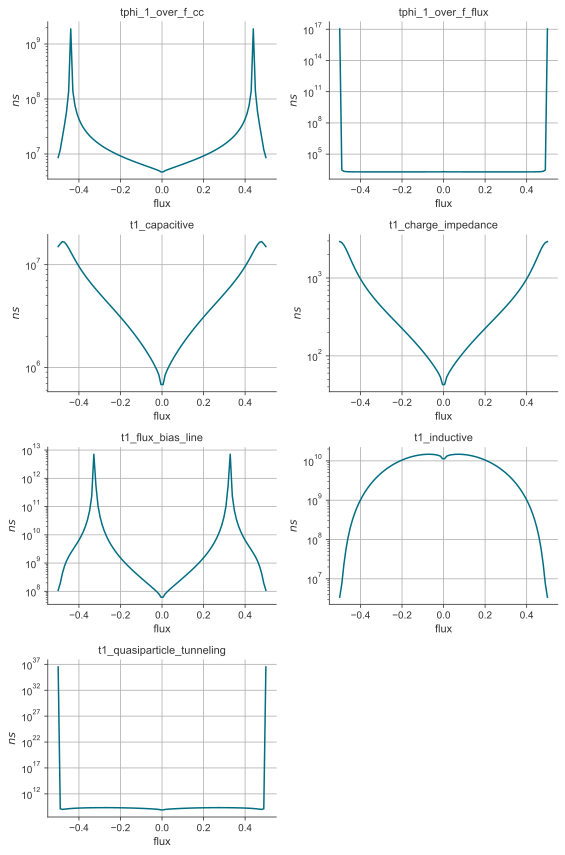

In [21]:
fluxonium.plot_coherence_vs_paramvals(param_name='flux', 
                                      param_vals=np.linspace(-0.5, 0.5, 100));